In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from umap import UMAP

## Read data

In [2]:
data = np.load("D:\\Projects\\umap\\input\\ccfs.npy")

In [3]:
data[:, None].shape

(713, 1, 4801)

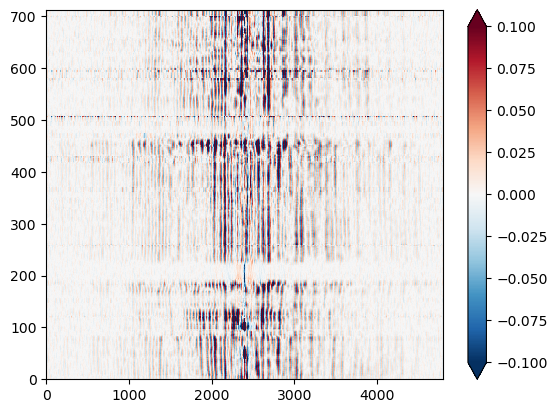

In [4]:
# Load
data = np.load("D:\\Projects\\umap\\input\\ccfs.npy")
data = data/np.max(np.abs(data))
# data = data[:, 2500:3500]
# data -= np.mean(data, axis=1)[:, None]

# Plot
fig, ax = plt.subplots()
img = ax.pcolorfast(data, vmin=-0.1, vmax=0.1, cmap="RdBu_r")
plt.colorbar(img, extend="both")
plt.show()

## Compress with UMAP

In [5]:
# Embed
model_umap = UMAP(n_components=2, metric="correlation", n_neighbors=20, min_dist=1)
embedding = model_umap.fit_transform(data)

# Cluster
model = DBSCAN(eps=1)
labels = model.fit_predict(embedding)

# Plot

In [6]:
# test = np.unique(labels)
# test
embedding.shape

(713, 2)

In [7]:
mask = labels == 0
# mask
embedding.max()

24.817932

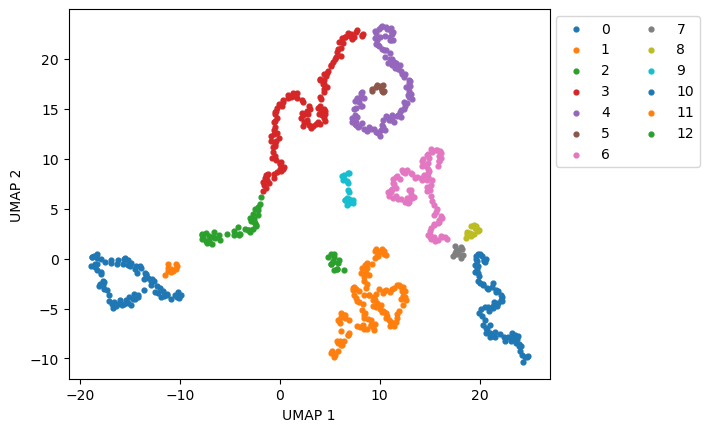

In [8]:
fig, ax = plt.subplots()

# Plot each cluster
for label in np.unique(labels):
    mask = labels == label
    ax.scatter(embedding[mask, 0], embedding[mask, 1], s=12, label=f"{label}")
ax.legend(ncol=2, loc="upper left", bbox_to_anchor=(1, 1))
ax.set_aspect("equal")
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
plt.show()

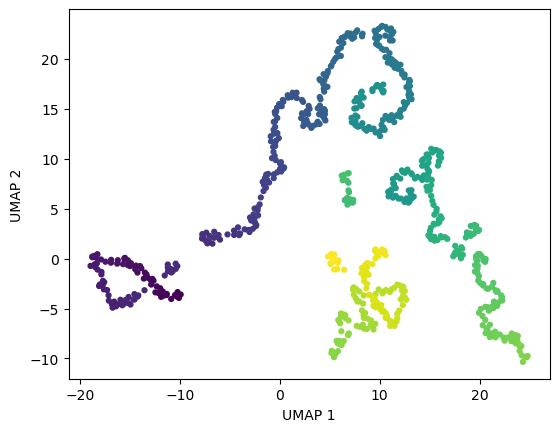

In [9]:
# Plot
fig, ax = plt.subplots()

# Plot each cluster
ax.scatter(embedding[:, 0], embedding[:, 1], s=12, c=np.arange(len(labels)))
ax.set_aspect("equal")
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
plt.show()

## Explore the clusters

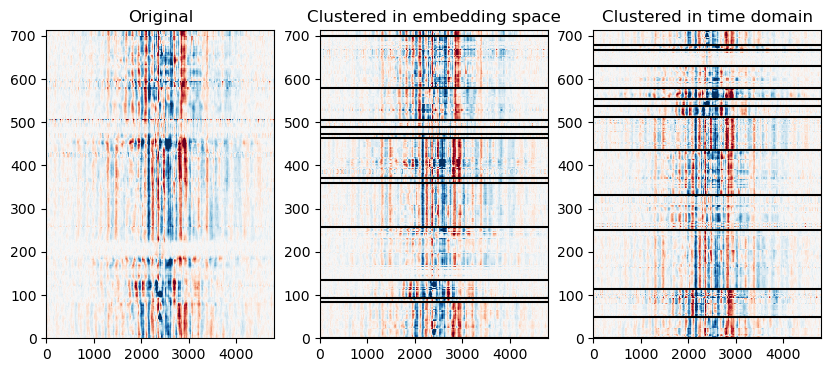

In [10]:
from sklearn.cluster import AgglomerativeClustering

# Sort the ccf matrix by cluster
order = np.argsort(labels)
data_sorted = data[order]

# Also cluster within the original space
model = AgglomerativeClustering(n_clusters=len(np.unique(labels)))
cluster_kmeans = model.fit_predict(data)
order_kmeans = np.argsort(cluster_kmeans)

# Plot
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
ax[0].pcolorfast(data, vmin=-0.1, vmax=0.1, cmap="RdBu_r")
ax[0].set_title("Original")

# DBSCAN
ax[1].pcolorfast(data_sorted, vmin=-0.1, vmax=0.1, cmap="RdBu_r")
ax[1].set_title("Clustered in embedding space")
for label in np.unique(labels):
    mask = labels[order] == label
    ax[1].axhline(np.where(mask)[0][0], color="black")

# Kmeans
ax[2].pcolorfast(data[order_kmeans], vmin=-0.1, vmax=0.1, cmap="RdBu_r")
ax[2].set_title("Clustered in time domain")
for label in np.unique(cluster_kmeans):
    mask = cluster_kmeans[order_kmeans] == label
    ax[2].axhline(np.where(mask)[0][0], color="black")


plt.show()

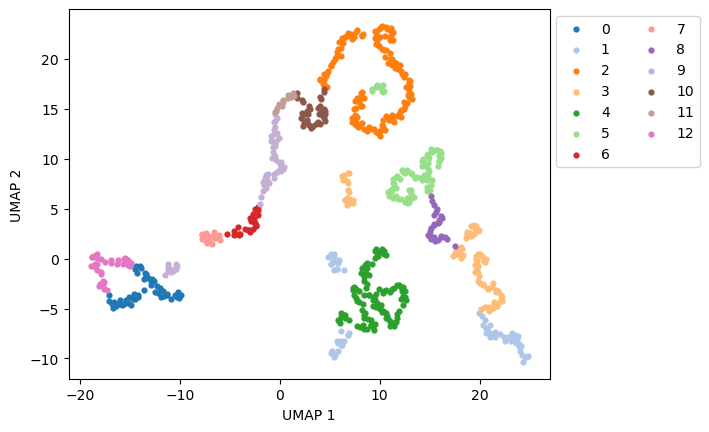

In [11]:
# Expand the list of available colors for plotting
from matplotlib import cm
import matplotlib
from cycler import cycler

# colors = cm.get_cmap("tab20").colors
colors = matplotlib.colormaps.get_cmap("tab20").colors

# Plot
fig, ax = plt.subplots()

# Plot each cluster
for label in np.unique(cluster_kmeans):
    mask = cluster_kmeans == label
    ax.scatter(embedding[mask, 0], embedding[mask, 1], s=12, label=f"{label}", color=colors[label])
ax.legend(ncol=2, loc="upper left", bbox_to_anchor=(1, 1))
ax.set_aspect("equal")
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
plt.show()

## Temporal evolution of the clusters

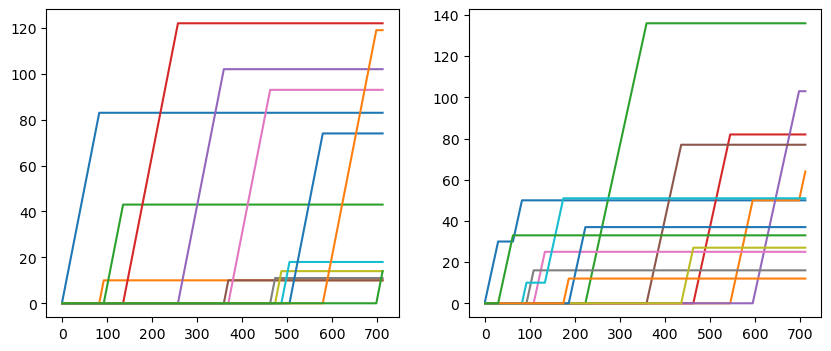

In [12]:
# Plot the cumulative sum of the cluster detection
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
for label in np.unique(labels):
    mask = labels == label
    ax[0].plot(np.cumsum(mask), label=f"{label}")

# Plot the cumulative sum of the cluster detection
for label in np.unique(cluster_kmeans):
    mask = cluster_kmeans == label
    ax[1].plot(np.cumsum(mask), label=f"{label}")

In [13]:
cluster_kmeans
# labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10,  2,  2

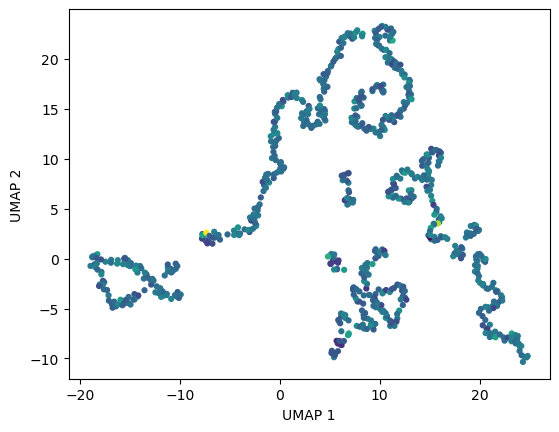

In [14]:
# Expand the list of available colors for plotting
from matplotlib import cm
from cycler import cycler

# colors = cm.get_cmap("tab20").colors
colors = matplotlib.colormaps.get_cmap("tab20").colors

# Plot
fig, ax = plt.subplots()
ax.scatter(embedding[:, 0], embedding[:, 1], s=12, c=np.mean(data, axis=1))
ax.set_aspect("equal")
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
plt.show()

In [15]:
# Inverse transform with zeroing the 2nd umap component
embedding_filtered = embedding.copy()
embedding_filtered[:, 1] = 0
icc = model_umap.inverse_transform(embedding_filtered)
icc /= np.max(np.abs(icc))

# plt.plot(data[0])


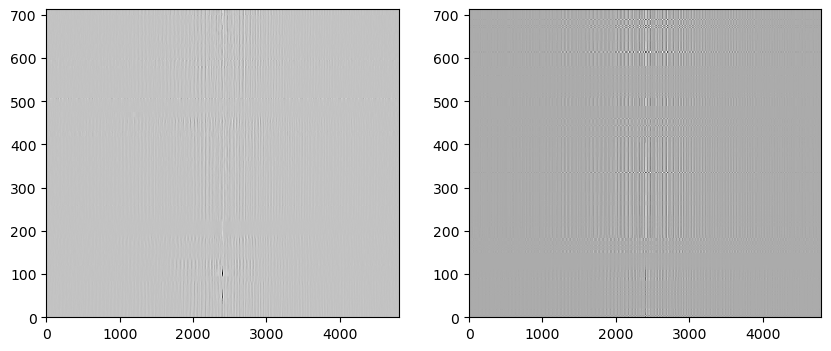

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[1].pcolorfast(icc, cmap="Greys")
ax[0].pcolorfast(data, cmap="Greys")



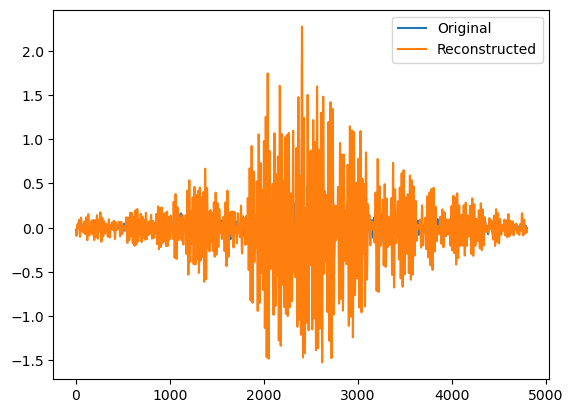

In [17]:
icc = model_umap.inverse_transform(embedding[0].reshape(1, -1) + np.random.randn(1, 2) * 2)
# icc /= np.max(np.abs(icc))
original = data[0] / np.max(np.abs(data[0]))
plt.plot(original, label="Original")
plt.plot(icc[0], label="Reconstructed")
plt.legend()
